In [5]:
import cv2
import numpy as np

def fillHoles(mask):
    maskFloodfill = mask.copy()
    h, w = maskFloodfill.shape[:2]
    maskTemp = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(maskFloodfill, maskTemp, (0, 0), 255)
    mask2 = cv2.bitwise_not(maskFloodfill)
    return mask2 | mask

In [10]:
# Read image
img = cv2.imread("red_eyes.jpg", cv2.IMREAD_COLOR)

# Output image
imgOut = img.copy()

# Load HAAR cascade
eyesCascade = cv2.CascadeClassifier("haarcascade_eye.xml")

# Detect eyes
eyes = eyesCascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=4, minSize=(100, 100))

# For every detected eye
for (x, y, w, h) in eyes:
    # Extract eye from the image
    eye = img[y:y+h, x:x+w]
    # Split eye image into 3 channels
    b = eye[:, :, 0]
    g = eye[:, :, 1]
    r = eye[:, :, 2]
    # Add the green and blue channels.
    bg = cv2.add(b, g)
    # Simple red eye detector.
    mask = (r > 150) &  (r > bg) 
        # Convert the mask to uint8 format.
    mask = mask.astype(np.uint8)*255
    # Clean mask -- 1) File holes 2) Dilate (expand) mask.
    mask = fillHoles(mask)
    mask = cv2.dilate(mask, None, anchor=(-1, -1), iterations=3, borderType=1, borderValue=1)
    # Calculate the mean channel by averaging
    # the green and blue channels
    mean = bg / 2
    mask = mask.astype(np.bool)[:, :, np.newaxis]
    mean = mean[:, :, np.newaxis]
    # Copy the eye from the original image.
    eyeOut = eye.copy()
    # Copy the mean image to the output image.
    #np.copyto(eyeOut, mean, where=mask)
    eyeOut = np.where(mask, mean, eyeOut)
    # Copy the fixed eye to the output image.
    imgOut[y:y+h, x:x+w, :] = eyeOut
    cv2.imshow('Red Eyes', img)
    cv2.imshow('Red Eyes Removed', imgOut)
    cv2.waitKey(0)

In [6]:
from histogram import gradient, magnitude_orientation, hog, visualise_histogram
import matplotlib.pyplot as plt
import numpy as np

def octagon():
    return np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                     [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                     [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                     [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                     [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

    
#img = octagon()
img = cv2.imread("red_eyes.jpg", cv2.IMREAD_COLOR)
gx, gy = gradient(img, same_size=False)
mag, ori = magnitude_orientation(gx, gy)

# Show gradient and magnitude
plt.figure()
plt.title('gradients and magnitude')
plt.subplot(141)
plt.imshow(img, cmap=plt.cm.Greys_r)
plt.subplot(142)
plt.imshow(gx, cmap=plt.cm.Greys_r)
plt.subplot(143)
plt.imshow(gy, cmap=plt.cm.Greys_r)
plt.subplot(144)
plt.imshow(mag, cmap=plt.cm.Greys_r)


# Show the orientation deducted from gradient
plt.figure()
plt.title('orientations')
plt.imshow(ori)
plt.pcolor(ori)
plt.colorbar()
plt.show()

ValueError: too many values to unpack

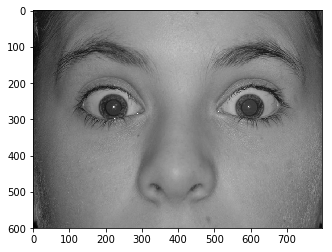

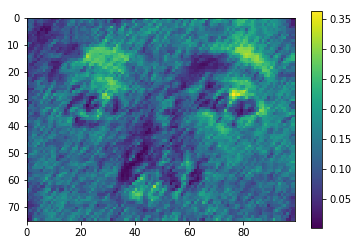

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(cv2.imread("red_eyes.jpg"),
                   cv2.COLOR_BGR2GRAY)

cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# winSize is the size of the image cropped to an multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
# hog_feats now contains the gradient amplitudes for each direction,
# for each cell of its group for each group. Indexing is by rows then columns.

gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# count cells (border cells appear less often across overlapping groups)
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Average gradients
gradients /= cell_count

# Preview
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

bin = 5  # angle is 360 / nbins * direction
plt.pcolor(gradients[:, :, bin])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

In [22]:
dist = hog1(img)
np.average(dist)

0.0023028733903604393

In [15]:
import numpy as np
def hog1(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    bin_n = 16 # Number of bins
    bin = np.int32(bin_n*ang/(2*np.pi))

    bin_cells = []
    mag_cells = []

    cellx = celly = 8

    for i in range(0,img.shape[0]/celly):
        for j in range(0,img.shape[1]/cellx):
            bin_cells.append(bin[i*celly : i*celly+celly, j*cellx : j*cellx+cellx])
            mag_cells.append(mag[i*celly : i*celly+celly, j*cellx : j*cellx+cellx])   

    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)

    # transform to Hellinger kernel
    eps = 1e-7
    hist /= hist.sum() + eps
    hist = np.sqrt(hist)
    #hist /= np.norm(hist) + eps

    return hist